In [35]:
import tensorflow as tf
import pandas as pd
import time
from sklearn.preprocessing import MinMaxScaler

In [36]:
message_data = pd.read_csv('/Users/tanvipotdar/Projects/LOBster/data_tqap/INTC_2015-01-01_2015-01-31_10/INTC_2015-01-02_34200000_57600000_message_10.csv', names=['time', 'event_type', 'order_id','size', 'price', 'direction'])
orderbook = pd.read_csv('/Users/tanvipotdar/Projects/LOBster/data_tqap/INTC_2015-01-01_2015-01-31_10/INTC_2015-01-02_34200000_57600000_orderbook_10.csv')
message_data.time = message_data.time.apply(lambda x: time.strftime('%H:%M:%S', time.gmtime(x)))
orderbook['time'] = message_data.time
orderbook['midprice'] = (orderbook.ask_price_1+orderbook.bid_price_1)/2

In [37]:
orderbook.drop_duplicates(inplace=True)
orderbook.set_index('time', inplace=True)
x = orderbook.drop('midprice',axis=1)
y = orderbook[['midprice']]
x.head()

,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,...,bid_price_8,bid_size_8,ask_price_9,ask_size_9,bid_price_9,bid_size_9,ask_price_10,ask_size_10,bid_price_10,bid_size_10
time,,,,,,,,,,,,,,,,,,,,,
09:30:00,367300,4000,365200,400,367500,200,364800,300,367900,300,...,361800,200,372900,1000,361500,200,373400,2500,360800,200
09:30:00,367300,4000,365200,100,367500,200,364800,300,367900,300,...,361800,200,372900,1000,361500,200,373400,2500,360800,200
09:30:00,367300,4000,365200,100,367500,200,364800,300,367900,300,...,362900,200,372900,1000,361800,200,373400,2500,361500,200
09:30:00,367300,4000,366700,100,367500,200,365200,100,367900,300,...,363000,100,372900,1000,362900,200,373400,2500,361800,200
09:30:00,367300,4000,366700,200,367500,200,365200,100,367900,300,...,363000,100,372900,1000,362900,200,373400,2500,361800,200


In [38]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)
x_train = x[:20000]
y_train = y[:20000]
x_test = x[20000:]
y_test = y[20000:]
print(x_train)

/Users/tanvipotdar/pyenvs/lob/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[[0.58653846 0.08731632 0.39423077 ... 0.06422682 0.05769231 0.00470491]
 [0.58653846 0.08731632 0.39423077 ... 0.06422682 0.05769231 0.00470491]
 [0.58653846 0.08731632 0.39423077 ... 0.06422682 0.125      0.00470491]
 ...
 [0.84615385 0.06548178 0.83653846 ... 0.0280427  0.83653846 0.03222866]
 [0.84615385 0.06548178 0.83653846 ... 0.0280427  0.83653846 0.03222866]
 [0.84615385 0.06548178 0.83653846 ... 0.0280427  0.83653846 0.03222866]]


In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(12, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [40]:
history = model.fit(x_train, y_train, epochs=10, batch_size=1,  verbose=1, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 17s 1ms/sample - loss: 9.3566e-04 - mean_squared_error: 9.3564e-04 - mean_absolute_error: 0.0053 - val_loss: 7.9739e-07 - val_mean_squared_error: 7.9739e-07 - val_mean_absolute_error: 7.1918e-04
Epoch 2/10
16000/16000 [==============================] - 16s 988us/sample - loss: 1.2550e-05 - mean_squared_error: 1.2550e-05 - mean_absolute_error: 0.0024 - val_loss: 1.4638e-06 - val_mean_squared_error: 1.4638e-06 - val_mean_absolute_error: 9.7244e-04
Epoch 3/10
16000/16000 [==============================] - 16s 991us/sample - loss: 1.0619e-05 - mean_squared_error: 1.0619e-05 - mean_absolute_error: 0.0022 - val_loss: 7.2871e-06 - val_mean_squared_error: 7.2871e-06 - val_mean_absolute_error: 0.0025
Epoch 4/10
16000/16000 [==============================] - 16s 988us/sample - loss: 9.5689e-06 - mean_squared_error: 9.5688e-06 - mean_absolute_error: 0.0020 - val_loss: 2.9071e-07 - val_mean_s

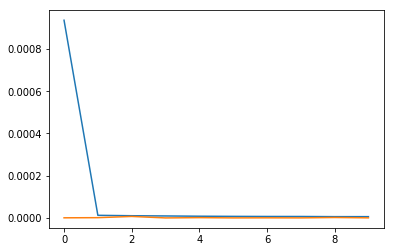

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [42]:
y_pred=model.predict(x_test)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(y_pred, y_test)

0.00016013154892488898